<a href="https://colab.research.google.com/github/RogerWolf-Hub/Rogerio/blob/main/mod29_tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [6]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

from tqdm.notebook         import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

In [8]:
df = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.Revenue.value_counts(dropna=False)

,count
Revenue,
False,10422
True,1908


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [10]:
# Exibe informações resumidas sobre o DataFrame df, incluindo o tipo de dado e a quantidade de valores não nulos em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
# Retorna uma série com a contagem de valores únicos em cada coluna do DataFrame df.
df.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


In [12]:
# Retorna a contagem de valores ausentes em cada coluna do DataFrame df.
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [13]:
# Retorna um resumo estatístico do DataFrame df, incluindo contagem, média, desvio padrão, valores mínimo e máximo, e os quartis.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
# Obtendo as colunas do DataFrame df correspondentes às seis primeiras colunas (índice 0 a 5).
colunas = df.iloc[:, 0:6].columns
df[colunas].head(0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration


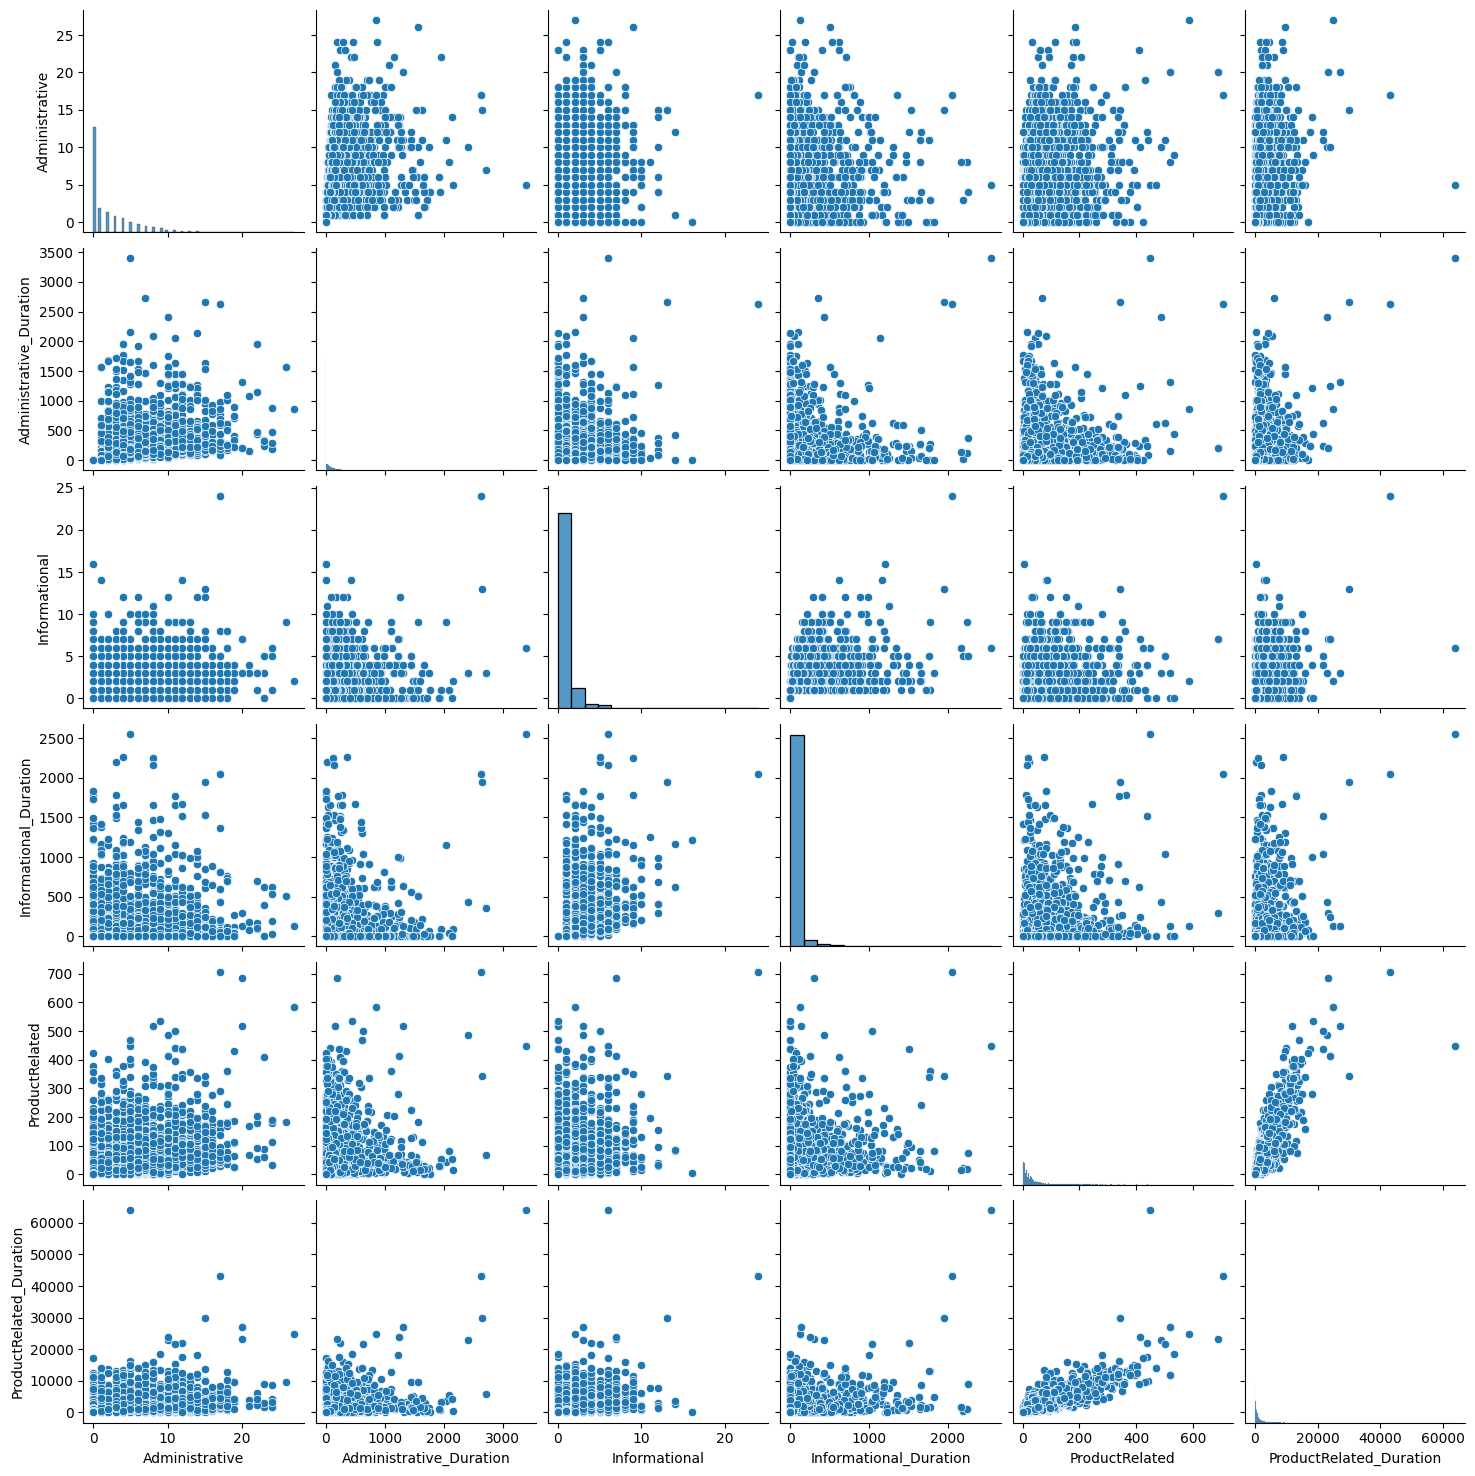

In [15]:
# Criação de um gráfico do tipo "pair plot" para visualizar a relação entre as seis primeiras variáveis no DataFrame df.
sns.pairplot(data = df[colunas])
plt.show()

In [16]:
# Cria uma cópia do DataFrame df.
df_pad = df.copy()

# Seleciona somente as colunas numéricas do DataFrame df_pad.
colunas_numericas = df_pad.select_dtypes(include = 'number').columns

# Aplica a padronização nas colunas numéricas do DataFrame df_pad, substituindo os valores das colunas padronizadas.
# As colunas são padronizadas usando a classe StandardScaler do scikit-learn.
# A classe StandardScaler centraliza os dados para ter média zero e escalona-os para ter desvio padrão igual a um.
df_pad[colunas_numericas] = pd.DataFrame(data=StandardScaler().fit_transform(df_pad[colunas_numericas]),
                                         columns=df_pad[colunas_numericas].columns)

# O DataFrame df_pad agora contém as colunas numéricas padronizadas.
df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,-1.233426,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,-0.136078,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,2.058618,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,0.961270,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,0.961270,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,2.058618,2.121412,-0.894178,-0.762629,Returning_Visitor,True,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,0.976499,Returning_Visitor,True,False
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,2.218733,Returning_Visitor,True,False
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,-0.136078,-0.207952,-0.061364,1.721839,Returning_Visitor,False,False


In [17]:
# Resumo estatístico do DataFrame df_pad após a padronização das variáveis.
df_pad.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,-5.532206e-17,4.610172e-18,1.498306e-17,7.722038e-17,-2.996612e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00


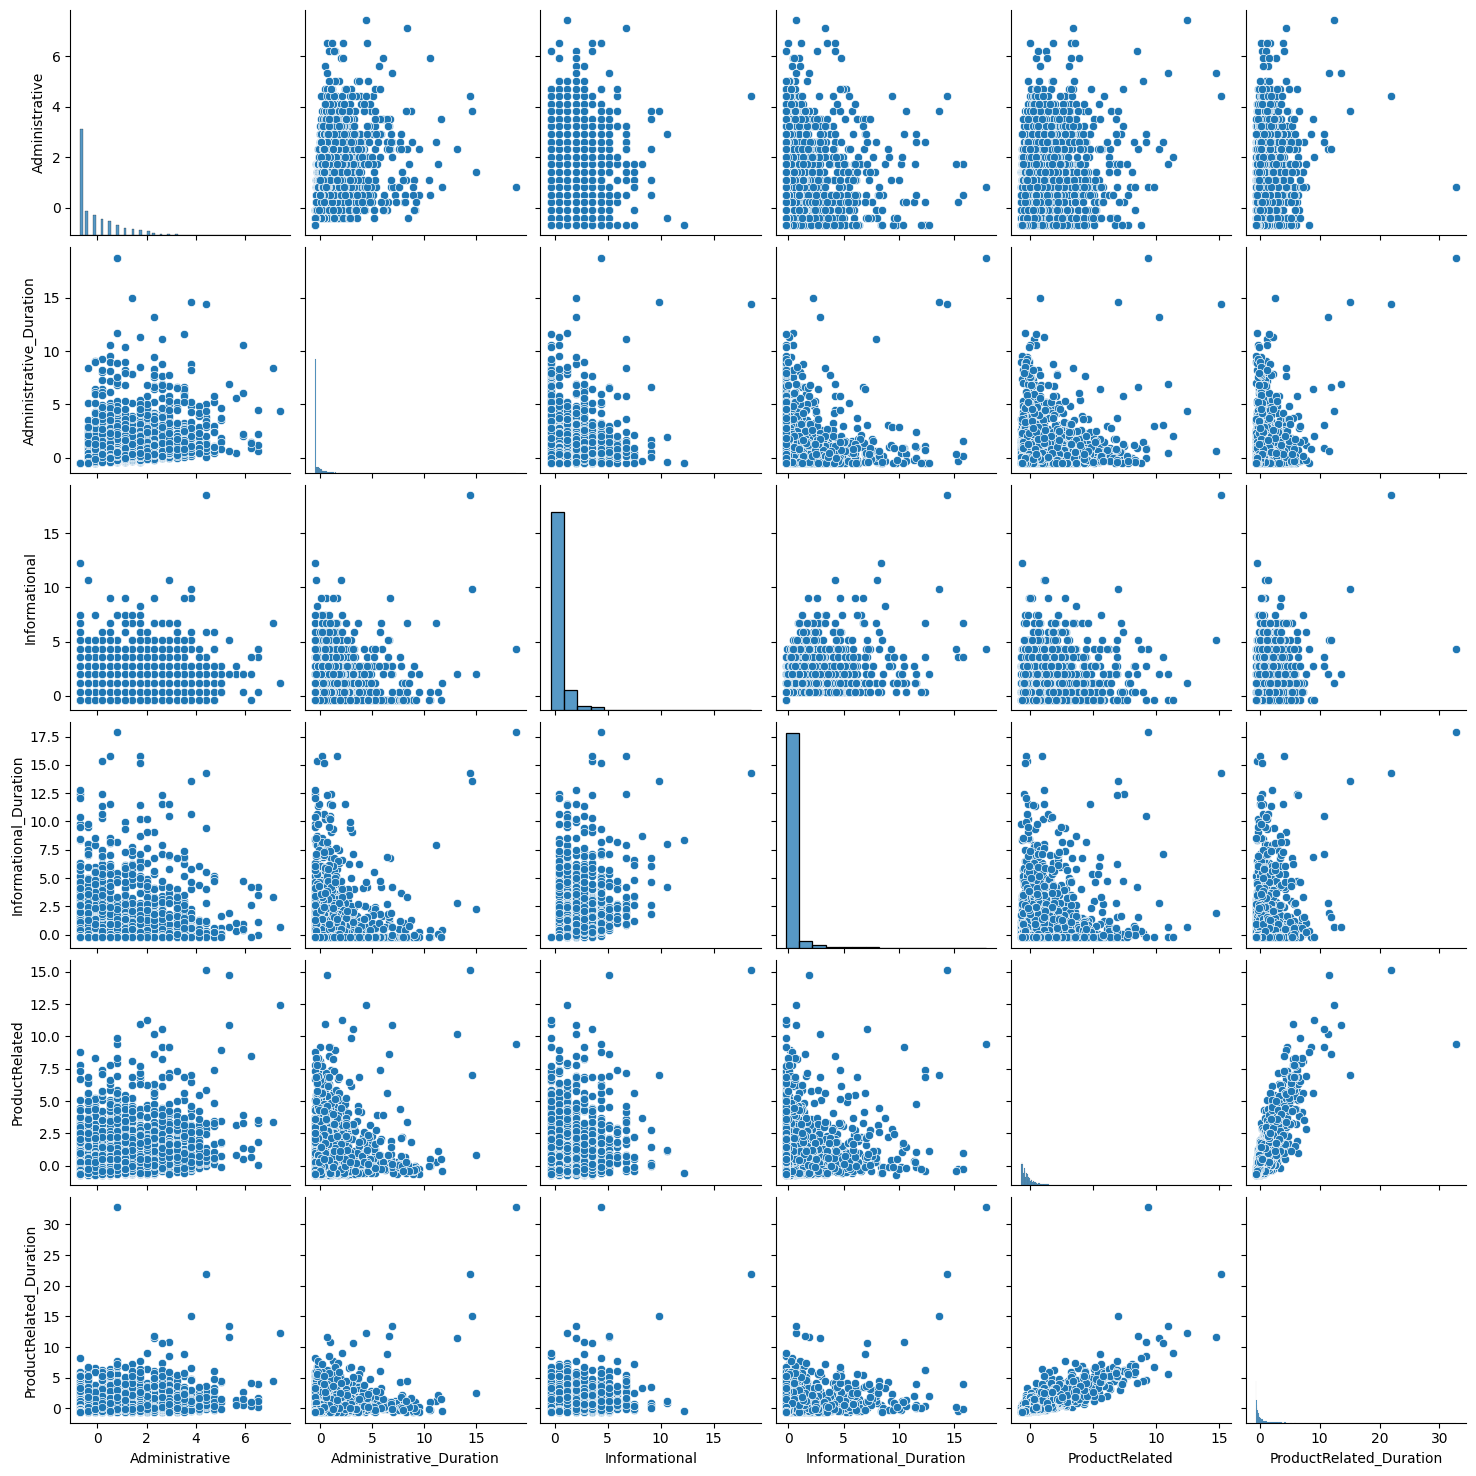

In [18]:
# Gráfico para visualizar a relação entre as variáveis no DataFrame df_pad com a padronização.
sns.pairplot(data = df_pad[colunas])
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

   n_clusters           SQD
0           1  73980.000000
1           2  51210.558199
2           3  43201.977479
3           4  37353.658300
4           5  33469.195532
5           6  29688.070162
6           7  26827.693862
7           8  25194.071177
8           9  22489.065022
9          10  21048.814572


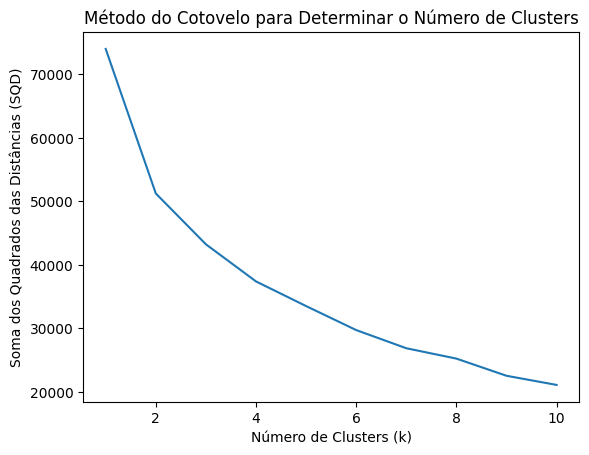

In [20]:
# Método do Cotovelo
# Inicialização de uma lista vazia para armazenar as somas dos quadrados das distâncias (SQD).
SQD = []

# Número máximo de clusters.
K = 10

# Loop para iterar sobre diferentes valores de k (número de clusters).
# Calcula o K-Means para cada valor de k e armazena a soma dos quadrados das distâncias na lista SQD.
for k in tqdm(range(1, K + 1)):
    km = KMeans(n_clusters = k,
                n_init = 'auto')
    km = km.fit(df_pad[colunas])
    SQD.append(km.inertia_)

# Criação de um DataFrame com os valores de k e suas respectivas somas dos quadrados das distâncias (SQD).
df_sqd = pd.DataFrame(data = {'n_clusters': list(range(1, len(SQD) + 1)),
                              'SQD': SQD})
# Exibe o DataFrame df_sqd com os valores de SQD para cada número de clusters.
print(df_sqd)

# Criação do gráfico para visualização do método do cotovelo.
plt.plot(df_sqd['n_clusters'],
         df_sqd['SQD'])
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SQD)')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.624690
1           3        0.507770
2           4        0.481722
3           5        0.507586
4           6        0.463428
5           7        0.471427
6           8        0.470685
7           9        0.461522
8          10        0.420292


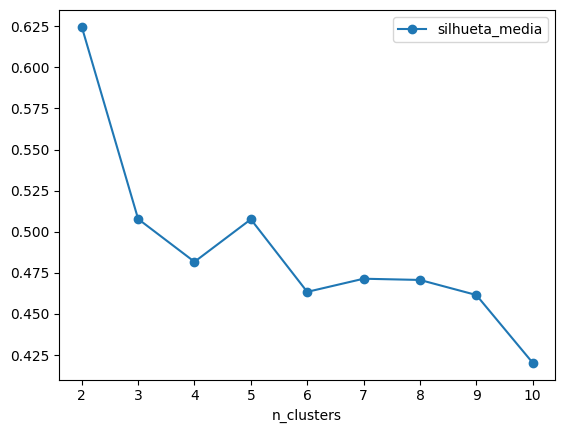

In [21]:
# Método da Silhueta
# Inicialização de uma lista vazia para armazenar os valores do Coeficiente da Silhueta.
silhuetas = []

# Número máximo de clusters a serem considerados (de 2 a max_clusters).
max_clusters = 10

# Loop para iterar sobre diferentes números de clusters.
# Calcula o K-Means para cada valor de n_clusters e armazena o Coeficiente da Silhueta na lista 'silhuetas'.
for n_clusters in tqdm(range(2, max_clusters + 1)):

    # Executa o K-Means com o número de clusters atual.
    km = KMeans(n_clusters = n_clusters,
                n_init = 'auto').fit(df_pad[colunas])

    # Calcula o Coeficiente da Silhueta e adiciona à lista 'silhuetas'.
    silhuetas.append(silhouette_score(X = df_pad[colunas],
                                      labels = km.labels_))

    # Criação de nomes para os grupos identificados pelo K-Means.
    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]

    # Adiciona uma nova coluna ao DataFrame df_pad_ com os rótulos dos grupos.
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_,
                                                                  categories = nomes_grupos)

# Criação de um DataFrame com os valores do Coeficiente da Silhueta médio para cada número de clusters.
df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)),
                                   'silhueta_media': silhuetas})
# Exibe o DataFrame com os valores do Coeficiente de Silhueta médio para cada número de clusters.
print(df_silhueta)

# Criação do gráfico de linha para visualização do Coeficiente da Silhueta médio em relação ao número de clusters.
df_silhueta.plot.line(x = 'n_clusters',
                      y = 'silhueta_media',
                      marker = 'o')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

<ipython-input-22-a514c0bdb44b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()


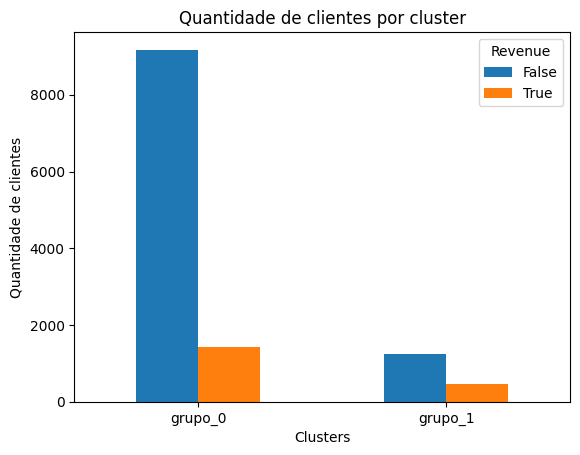

<ipython-input-22-a514c0bdb44b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()


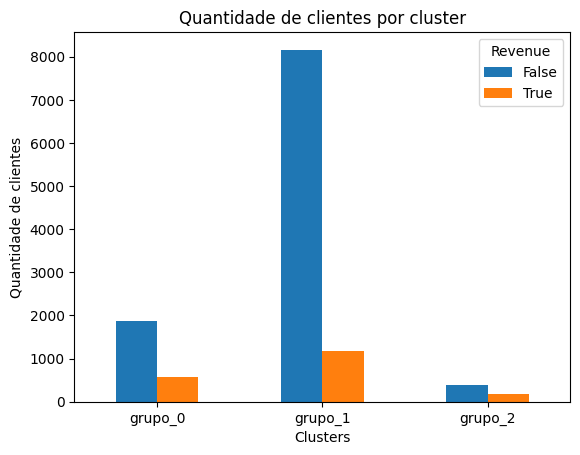

<ipython-input-22-a514c0bdb44b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()


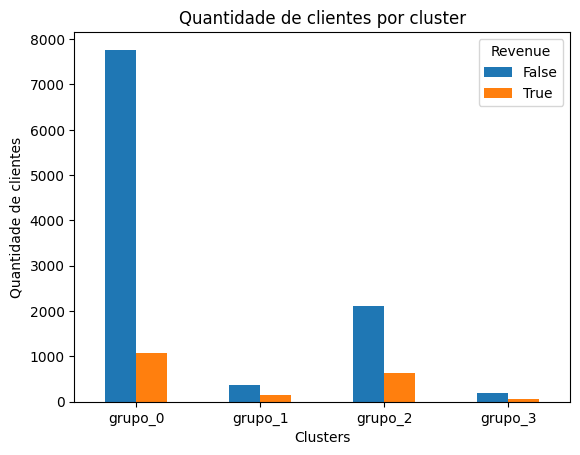

In [22]:
def cluster_barplot(data: pd.DataFrame, coluna_cluster: str) -> None:
    """
    Cria um gráfico de barras para mostrar a quantidade de clientes por cluster.

    Parâmetros:
        data (pd.DataFrame): O DataFrame contendo os dados.
        coluna_cluster (str): O nome da coluna que contém as informações dos clusters.

    Retorna:
        None
    """
    # Agrupa os dados pelo cluster e por 'Revenue', contando a quantidade de clientes em cada combinação.
    df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()

    # Cria um gráfico de barras a partir do DataFrame agrupado.
    ax = df_agrupado.plot.bar(rot=0)

    # Define rótulos para os eixos X e Y, além do título do gráfico.
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xlabel('Clusters')
    plt.title('Quantidade de clientes por cluster')

    # Exibe o gráfico.
    plt.show()

# Exemplo de uso:

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (2 clusters).
cluster_barplot(data = df_pad, coluna_cluster = 'grupos_2')

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (3 clusters).
cluster_barplot(df_pad, 'grupos_3')

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (4 clusters).
cluster_barplot(df_pad, 'grupos_4')

In [23]:
# Cria uma cópia do DataFrame padronizado df_pad.
df_pad_ = df_pad.copy()

# Renomeia as duas categorias na coluna 'grupos_2' para rótulos mais descritivos.
df_pad_['grupos_2'] = df_pad_['grupos_2'].cat.rename_categories({'grupo_0': 'Não interessados',
                                                                 'grupo_1': 'Compradores'})

# Renomeia as três categorias na coluna 'grupos_3' para rótulos mais descritivos.
df_pad_['grupos_3'] = df_pad_['grupos_3'].cat.rename_categories({'grupo_0': 'Não interessados',
                                                                 'grupo_1': 'Potenciais compradores',
                                                                 'grupo_2': 'Compradores'})

<ipython-input-22-a514c0bdb44b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()


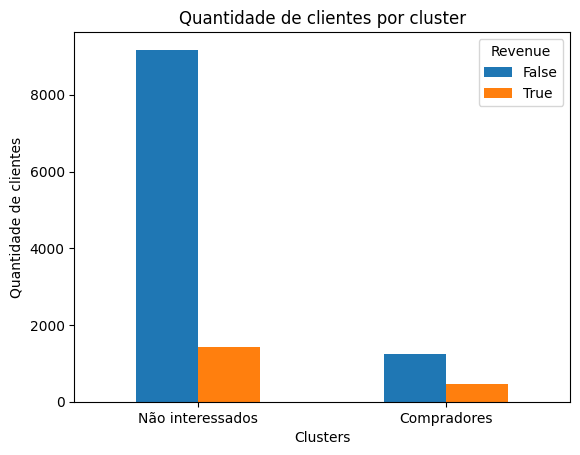

<ipython-input-22-a514c0bdb44b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()


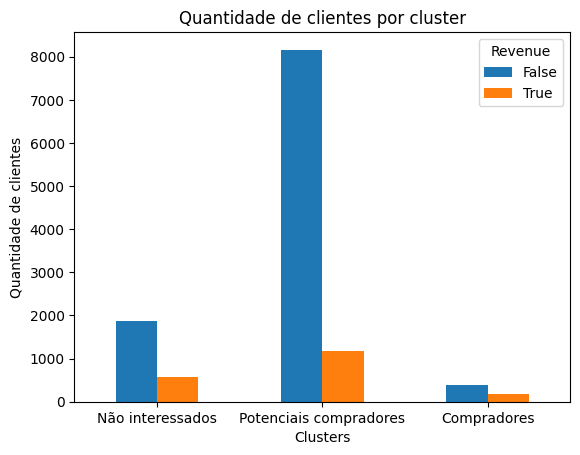

In [24]:
# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (2 clusters) usando as categorias renomeadas.
cluster_barplot(df_pad_, 'grupos_2')

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (3 clusters) usando as categorias renomeadas.
cluster_barplot(df_pad_, 'grupos_3')

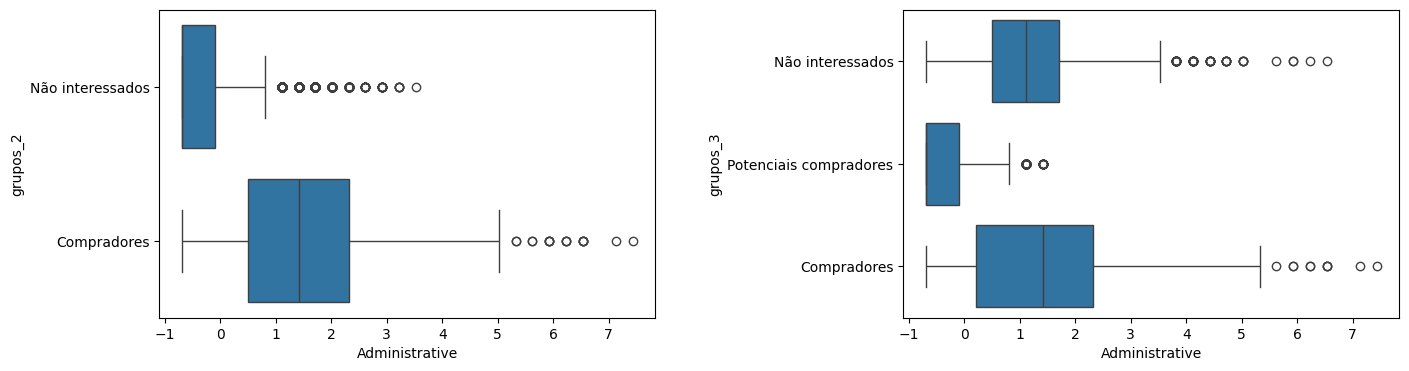

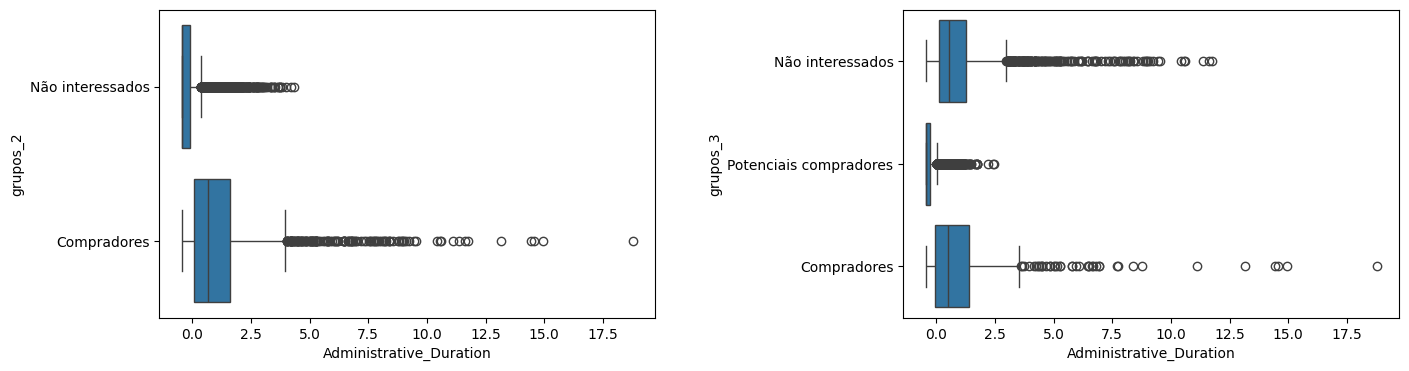

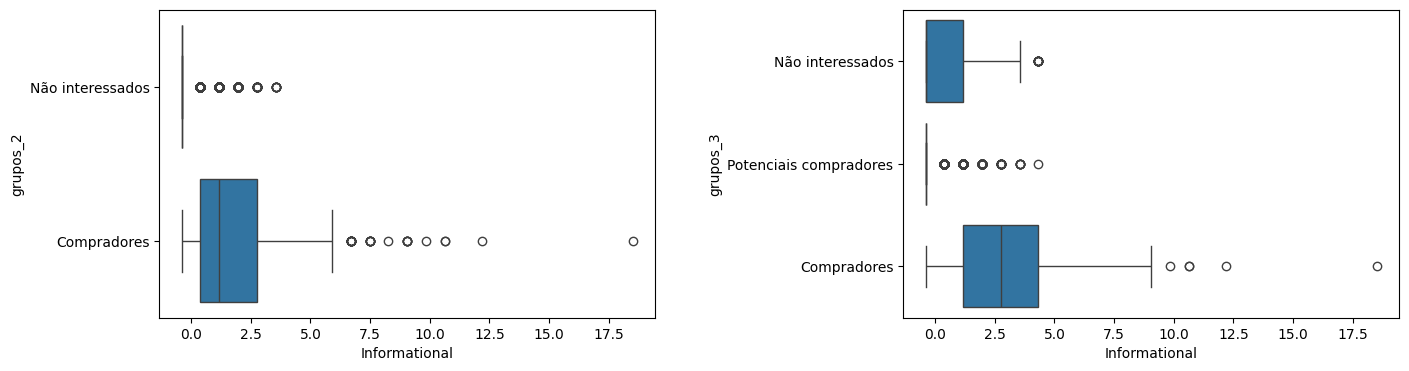

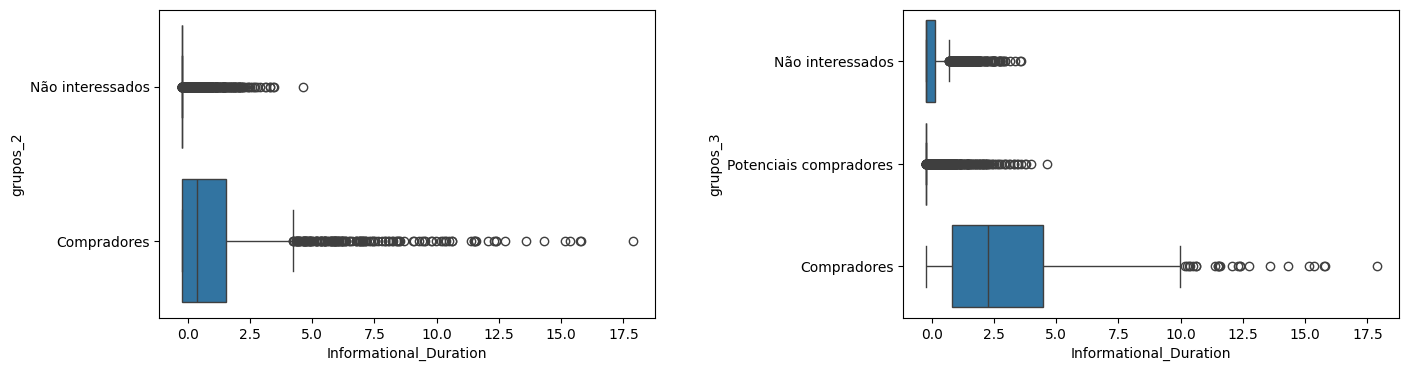

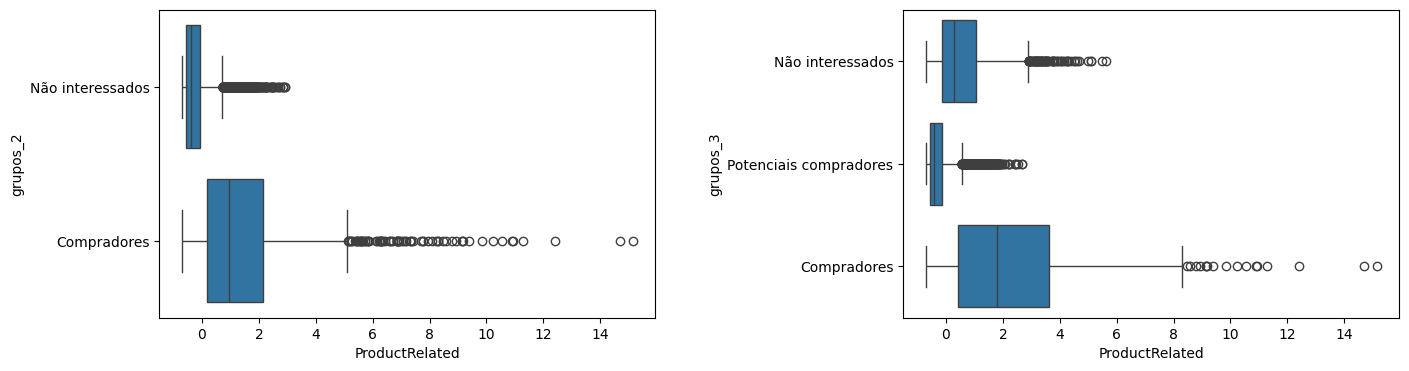

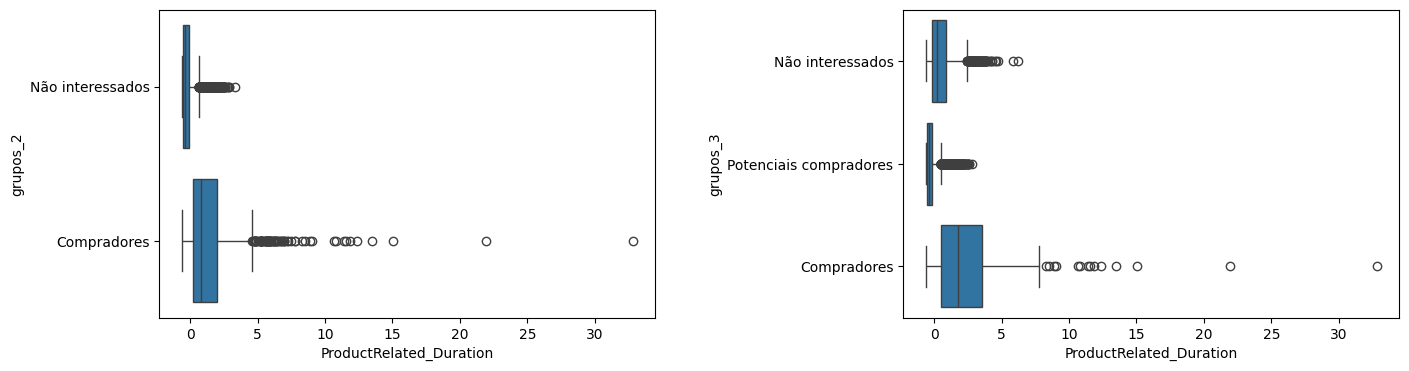

In [25]:
# Loop para criar boxplots para cada uma das seis primeiras variáveis numéricas.
for n in range(6):
    # Cria uma figura com dois subplots, um para cada conjunto de clusters.
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    # Cria um boxplot para o conjunto de clusters 'grupos_2'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_2', ax=ax[0])

    # Cria um boxplot para o conjunto de clusters 'grupos_3'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_3', ax=ax[1])

    # Ajusta o espaço entre os subplots.
    plt.subplots_adjust(wspace=0.5)

    # Exibe os gráficos.
    plt.show()

<ipython-input-26-7d1a5813a068>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.plot(df_pad_.groupby(['grupos_3'])[colunas].mean(), 'o')


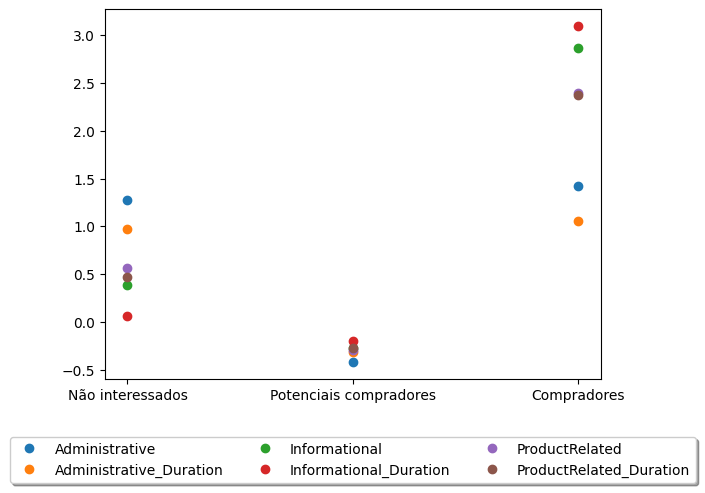

In [26]:
# Cria uma figura e um conjunto de eixos para o gráfico de dispersão.
fig, ax = plt.subplots()

# Plota um gráfico de dispersão para as médias das variáveis numéricas em diferentes clusters.
ax.plot(df_pad_.groupby(['grupos_3'])[colunas].mean(), 'o')
# ax.plot(df_pad_.groupby(['grupos_3'])[colunas].mean().apply(lambda x: (x - x.min())/(x.max() - x.min())), 'o ')

# Adiciona uma legenda ao gráfico com os nomes das variáveis.
ax.legend(colunas, loc='lower center', bbox_to_anchor=(0.5, -.3), ncol=3, fancybox=True, shadow=True)

# Exibe o gráfico.
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [27]:
# Cria uma tabela de contingência cruzando as variáveis 'Revenue' e 'grupos_2' no DataFrame.
# Normaliza os valores globalmente (por todos os valores) para obter proporções relativas.
# Inclui uma linha e coluna de margens ('All') para somar as proporções.
pd.crosstab(df_pad_['Revenue'], df_pad_['grupos_2'], normalize='all', margins=True).round(decimals = 2)

grupos_2,Não interessados,Compradores,All
Revenue,,,
False,0.74,0.10,0.85
True,0.12,0.04,0.15
All,0.86,0.14,1.00


In [28]:
# Agrupa os dados pelo corte nos valores da coluna 'BounceRates', 'Revenue' e 'grupos_3'.
# Calcula a contagem de observações em cada combinação de grupos.
# Em seguida, calcula a média das contagens ao longo do eixo 1 (colunas) para cada linha.
# Converte a série resultante em um DataFrame e realiza o desempilhamento (unstack).
# Renomeia a coluna '0' para 'Quantidade'.
# Converte os valores para inteiros.

(df_pad_.groupby([pd.qcut(x = df_pad_['BounceRates'],
                          q = 10,
                          duplicates = 'drop'),
                  'Revenue',
                  'grupos_3'])
        .count()
        .mean(axis = 1)
        .to_frame()
        .unstack()
        .rename(columns={0: 'Quantidade'})
        .astype(int))


<ipython-input-28-834dd76d3702>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_pad_.groupby([pd.qcut(x = df_pad_['BounceRates'],


Quantidade                                   
grupos_3                 Não interessados Potenciais compradores Compradores
BounceRates      Revenue                                                    
(-0.459, -0.393] False                875                   3946         140
                 True                 315                    820          69
(-0.393, -0.31]  False                352                    517         106
                 True                 124                    100          51
(-0.31, -0.192]  False                308                    633          68
                 True                  82                     92          33
(-0.192, 0.0183] False                230                    819          50
                 True                  42                     86          13
(0.0183, 0.743]  False                101                   1041          17
                 True                   9                     56           2
(0.743, 3.667]   False                 11                   1207           1
                 True                   0                     14           0

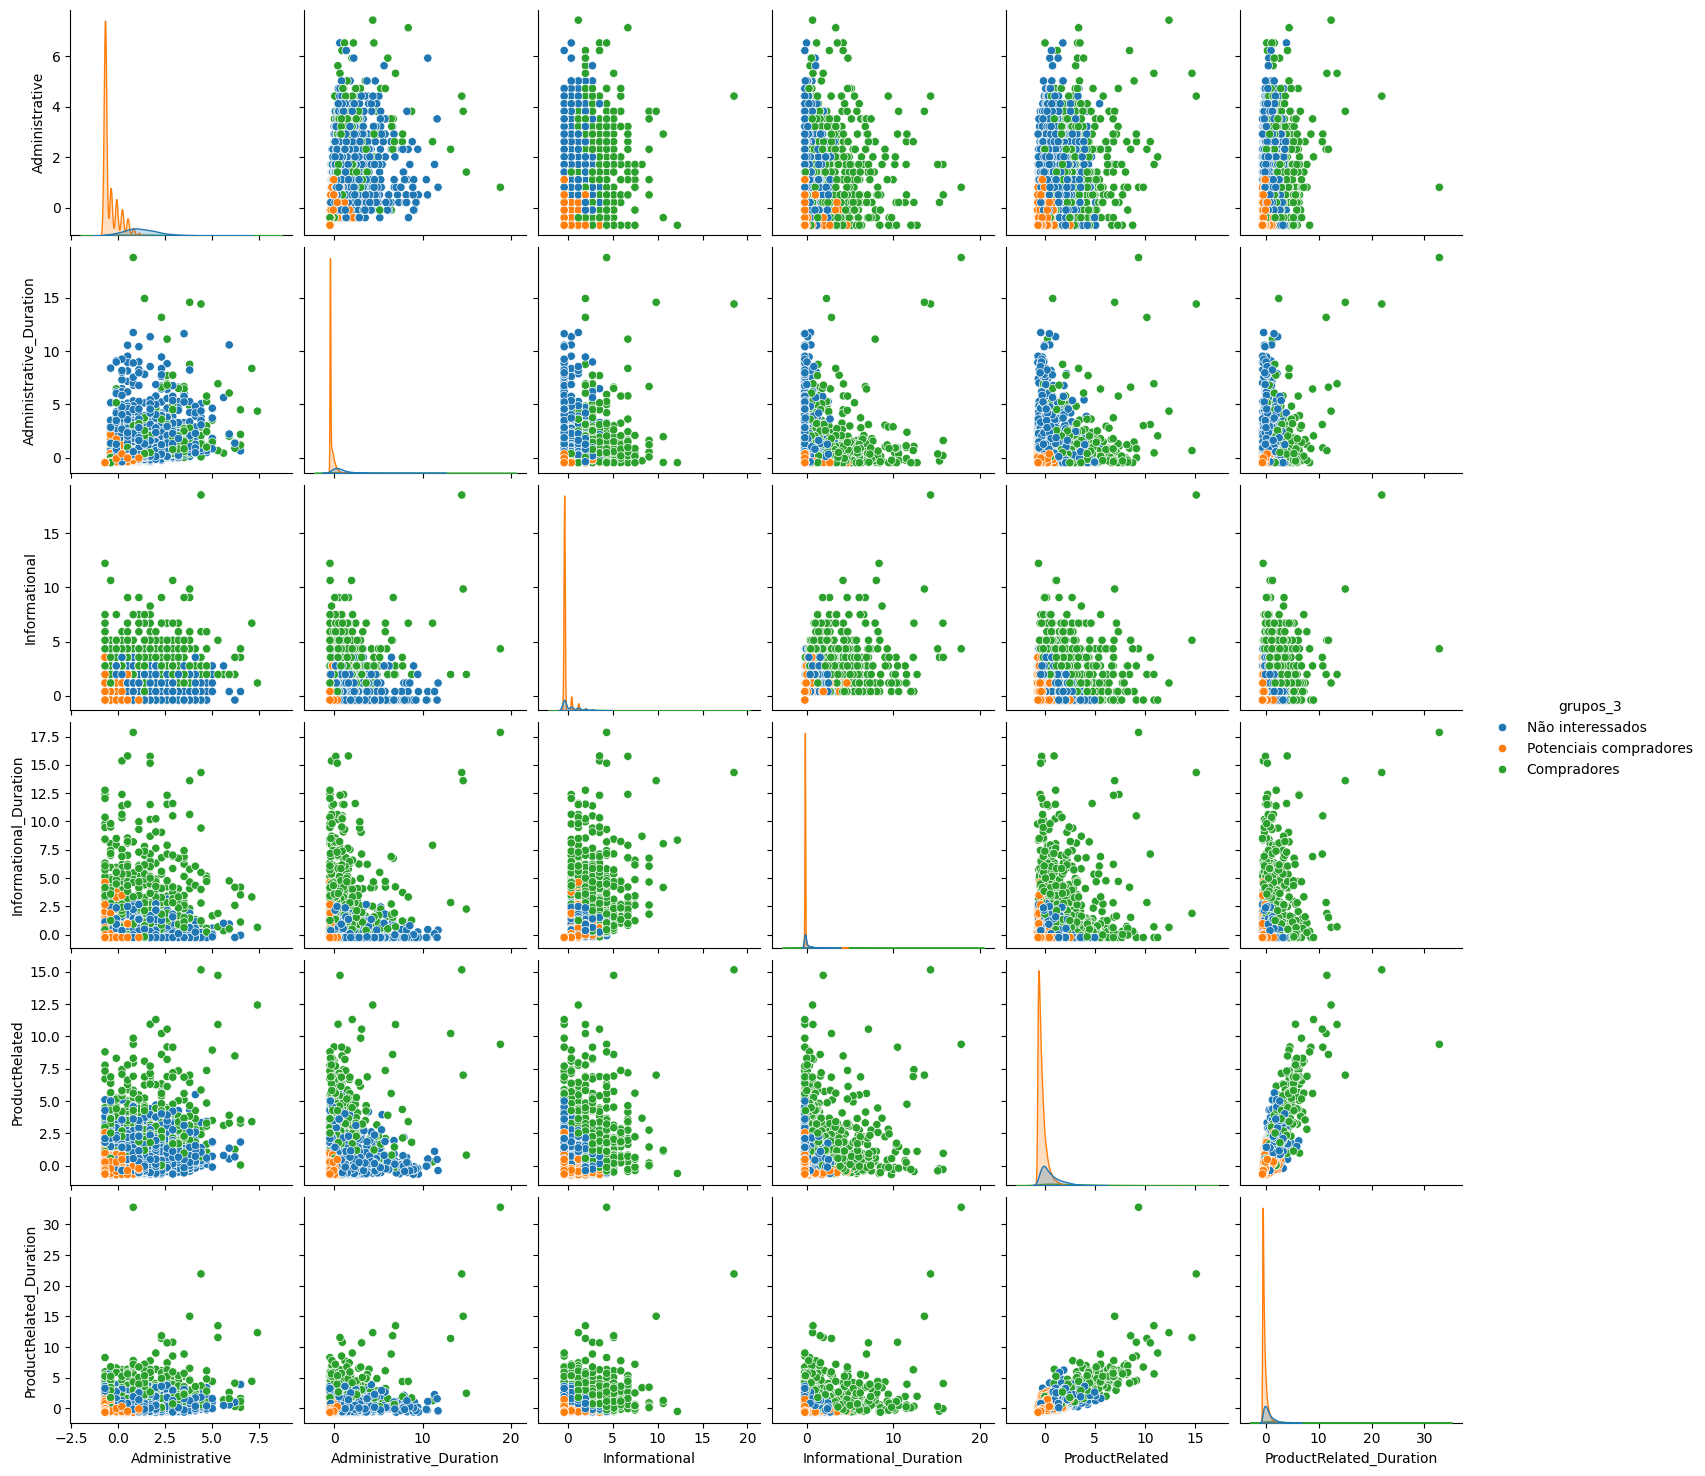

In [29]:
# Pair plot para visualizar a relação entre as variáveis padronizadas após a clusterização.
# A coluna 'grupos_3' é usada para colorir os pontos com base nos três diferentes grupos.
sns.pairplot(data=df_pad_[list(colunas) + ['grupos_3']], hue='grupos_3')

# Exibe o gráfico.
plt.show()